## Importação das bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVR
from sklearn.dummy import DummyRegressor
from sklearn import linear_model as ML

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Importação dos dados

In [ ]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
dados.shape

(127380, 136)

## Exploração dos dados

In [ ]:
dados['SG_UF_RESIDENCIA'].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [ ]:
len(dados['SG_UF_RESIDENCIA'].unique())

27

In [ ]:
dados['SG_UF_RESIDENCIA'].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [ ]:
dados["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [ ]:
dados["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

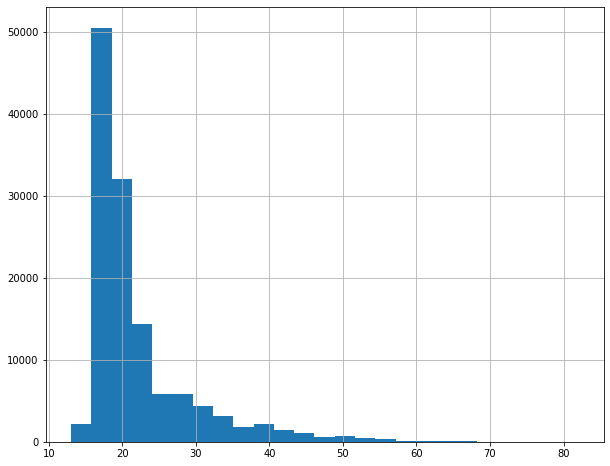

In [ ]:
dados['NU_IDADE'].hist(bins = 25, figsize = (10,8))

In [ ]:
dados.query("IN_TREINEIRO == 1")['NU_IDADE'].value_counts().sort_index() # faz a query pegando so quem é treineiro = 1 e em seguida seleciona só os dados que quer no caso a idade.

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

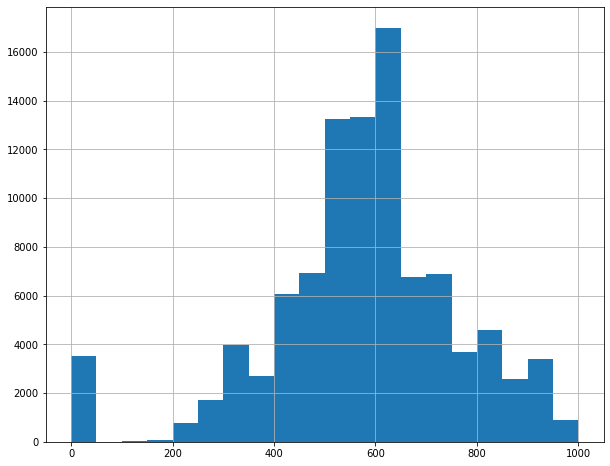

In [ ]:
dados['NU_NOTA_REDACAO'].hist(bins = 20, figsize = (10,8))

In [ ]:
dados['NU_NOTA_REDACAO'].mean()

571.5700253970197

In [ ]:
dados['NU_NOTA_REDACAO'].std()

188.07645455749753

In [ ]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


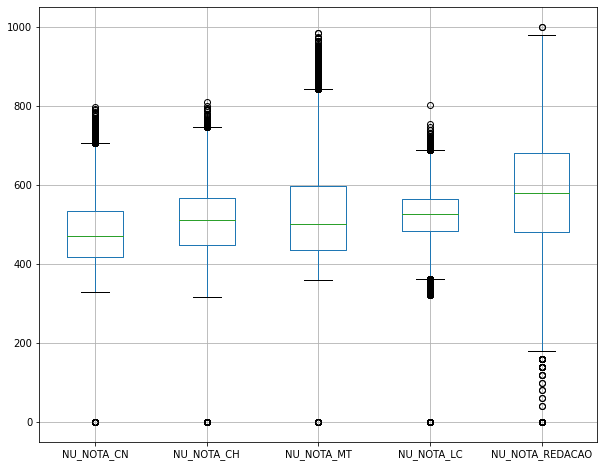

In [ ]:
dados[provas].boxplot(grid = True, figsize = (10,8))

## Analise dos dados

### IDADE

In [ ]:
# Identificar a menor idade e a maior idade dentro da amostra.
dados["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

In [ ]:
# Identificar se os alunos com menos de 14 anos são treineiros ou não.

dados.query("NU_IDADE == 13")['IN_TREINEIRO'].value_counts()


0    4
Name: IN_TREINEIRO, dtype: int64

In [ ]:
# Identificar quem é treineiro pela idade.

pd.crosstab(index=dados['NU_IDADE'], columns=dados['IN_TREINEIRO'])

IN_TREINEIRO,0,1
NU_IDADE,,
13,4,0
14,77,64
15,82,1927
16,688,7142
17,16355,4901
...,...,...
73,2,0
75,2,0
76,1,0


In [ ]:
# Identificar se os inscritos de < 14 compareceram nas provas

# 0 = faltou
# 1 = present
# 2 = eliminado

# Dia de Ciencias da natureza e matematica.
pd.crosstab(index=dados['NU_IDADE'], columns=dados['TP_PRESENCA_CN'])

TP_PRESENCA_CN,0,1,2
NU_IDADE,,,
13,2,2,0
14,24,117,0
15,280,1727,2
16,890,6939,1
17,2511,18736,9
...,...,...,...
73,0,2,0
75,1,1,0
76,1,0,0


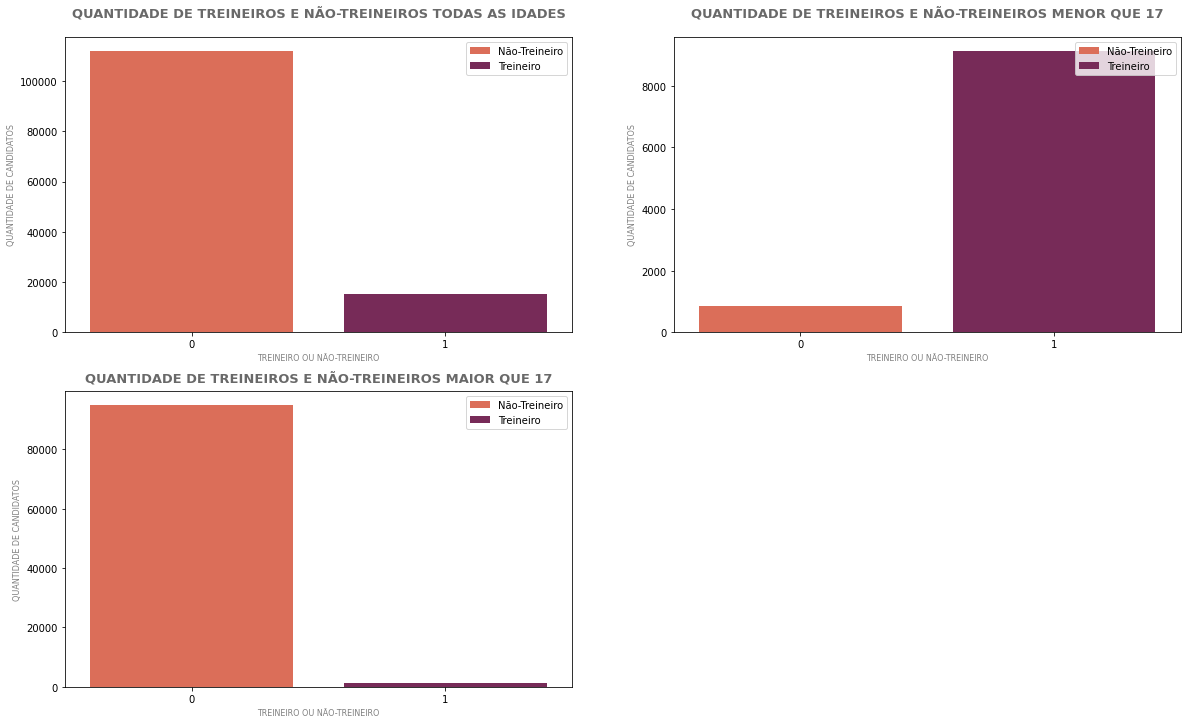

In [ ]:
plt.figure(figsize=(20, 25))

# Quantidade de pessoas que fizeram o enem só para treinar.
ax0 = plt.subplot(4, 2, 1)
ax0 = sns.countplot(x = 'IN_TREINEIRO',data = dados, hue = 'IN_TREINEIRO', dodge = False, palette='rocket_r')
ax0 = plt.title('QUANTIDADE DE TREINEIROS E NÃO-TREINEIROS TODAS AS IDADES', pad = 20, fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax0 = plt.xlabel('TREINEIRO OU NÃO-TREINEIRO', color = 'grey', fontsize = 8)
ax0 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', fontsize = 8)
ax0 = plt.legend(loc=1, labels=['Não-Treineiro', 'Treineiro'])

# Quantidade de pessoas menores 17 que fizeram o nenem para treinar.
dados_idade_menor_dezessete = dados.query('NU_IDADE < 17')
ax0 = plt.subplot(4, 2, 2)
ax1 = sns.countplot(x = 'IN_TREINEIRO',data = dados_idade_menor_dezessete, hue = 'IN_TREINEIRO', dodge = False, palette='rocket_r')
ax1 = plt.title('QUANTIDADE DE TREINEIROS E NÃO-TREINEIROS MENOR QUE 17', pad = 20, fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax1 = plt.xlabel('TREINEIRO OU NÃO-TREINEIRO', color = 'grey', fontsize = 8)
ax1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', fontsize = 8)
ax1 = plt.legend(loc=1, labels=['Não-Treineiro', 'Treineiro'])

# Quantidade de pessoas menores 17 que fizeram o nenem para treinar.
dados_idade_menor_dezessete = dados.query('NU_IDADE > 17')
ax2 = plt.subplot(4, 2, 3)
ax2 = sns.countplot(x = 'IN_TREINEIRO',data = dados_idade_menor_dezessete, hue = 'IN_TREINEIRO', dodge = False, palette='rocket_r')
ax2 = plt.title('QUANTIDADE DE TREINEIROS E NÃO-TREINEIROS MAIOR QUE 17', pad = 10, fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax2 = plt.xlabel('TREINEIRO OU NÃO-TREINEIRO', color = 'grey', fontsize = 8)
ax2 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', fontsize = 8)
ax2 = plt.legend(loc=1, labels=['Não-Treineiro', 'Treineiro'])



In [ ]:
# Dia de Ciencias da humanas e linguagem e codigo
pd.crosstab(index=dados['NU_IDADE'], columns=dados['TP_PRESENCA_CH'])

TP_PRESENCA_CH,0,1,2
NU_IDADE,,,
13,2,2,0
14,14,127,0
15,161,1847,1
16,516,7305,9
17,1704,19532,20
...,...,...,...
73,0,2,0
75,0,2,0
76,1,0,0


**Algumas observações**

    Ordem de aplicação das provas:
    1 - Linguagens e codigos, ciencias humanas e redacao (dia 1)
    2 - C. Natureza e matematica (dia 2)


Conclusões

    1 - As Pessoas menores de 17 anos são a maioria treineiros, idade que estão terminando o colegial.
    2 - As pessoas maiores de 17 anos são a maioria não-treineiro, idade que provavelmente já terminaram o colegial.


### PRESENÇA NA PROVA (FALTAS)

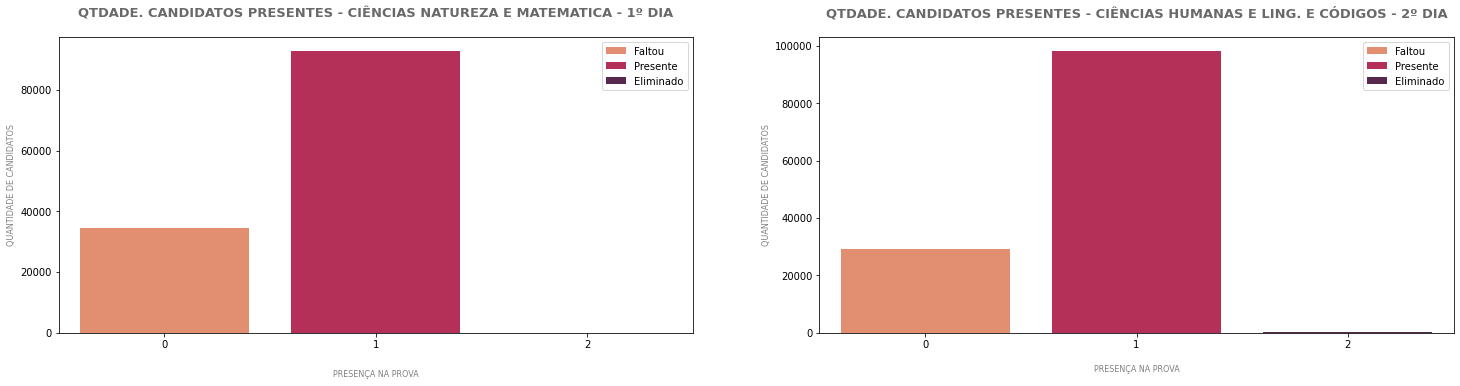

In [ ]:
plt.figure(figsize=(25, 25))

# Primeiro dia de prova
ax1 = plt.subplot(4, 2, 1)
ax1 = sns.countplot(x = 'TP_PRESENCA_CN',data = dados, hue = 'TP_PRESENCA_CN',dodge = False, palette='rocket_r')
ax1 = plt.title('QTDADE. CANDIDATOS PRESENTES - CIÊNCIAS NATUREZA E MATEMATICA - 1º DIA', pad = 20, fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax1 = plt.xlabel('PRESENÇA NA PROVA', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', fontsize = 8)
ax1 = plt.legend(labels=['Faltou', 'Presente', 'Eliminado'])
ax1 = plt.legend(loc=1, labels=['Faltou', 'Presente', 'Eliminado'])

# Segundo dia de prova
ax2 = plt.subplot(4, 2, 2)
ax2 = sns.countplot(x = 'TP_PRESENCA_CH',data = dados, hue = 'TP_PRESENCA_CH', dodge = False, palette='rocket_r')
ax2 = plt.title('QTDADE. CANDIDATOS PRESENTES - CIÊNCIAS HUMANAS E LING. E CÓDIGOS - 2º DIA', pad = 20, fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax2 = plt.xlabel('PRESENÇA NA PROVA', color = 'grey', labelpad = 15, fontsize = 8)
ax2 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', fontsize = 8)
ax2 = plt.legend(labels=['Faltou', 'Presente', 'Eliminado'])
ax2 = plt.legend(loc=1, labels=['Faltou', 'Presente', 'Eliminado'])


In [ ]:
# Entender o porque as pessoas faltaram.

dados_pessoas_faltantes = dados.query('TP_PRESENCA_CH == 0')

# Estado das pessoas que faltaram.
dados_pessoas_faltantes['SG_UF_RESIDENCIA'].value_counts()

# As pessoas que faltaram de acordo com numero de veiculos em casa.
dados_pessoas_faltantes['Q011'].replace('A', 'Não possui', inplace = True)
dados_pessoas_faltantes['Q011'].replace('B', ' Possui 1 ', inplace = True)
dados_pessoas_faltantes['Q011'].replace('C', ' Possui 2 ', inplace = True)
dados_pessoas_faltantes['Q011'].replace('D', ' Possui 3 ', inplace = True)
dados_pessoas_faltantes['Q011'].replace('E', ' Possui 4 ou mais ', inplace = True)

# Criação dataframe.
df_dados_pessoas_faltantes_carro = pd.DataFrame(dados_pessoas_faltantes['Q010'].value_counts()) # carro

# Alteração do nome da coluna.
df_dados_pessoas_faltantes_carro.rename(columns={'Q010': 'Qtd de pessoas'})

,Qtd de pessoas
A,18925
B,8700
C,1321
D,217
E,48


In [ ]:
# Criação dataframe.
df_dados_pessoas_faltantes_moto = pd.DataFrame(dados_pessoas_faltantes['Q011'].value_counts()) # moto

# Alteração do nome da coluna.

df_dados_pessoas_faltantes_moto.columns.name = 'QTD DE MOTO'
df_dados_pessoas_faltantes_moto.rename(columns={'Q011': 'TOTAL DE PESSOAS'})


QTD DE MOTO,TOTAL DE PESSOAS
Não possui,22888
Possui 1,5778
Possui 2,501
Possui 3,37
Possui 4 ou mais,7


In [ ]:
# Quantidade de pessoas que faltaram por renda familiar.

dados_pessoas_faltantes['Q006'].value_counts().sort_index()


A    1571
B    7924
C    8588
D    2995
E    2682
F    1191
G    1381
H     769
I     527
J     300
K     219
L     138
M     143
N     222
O     184
P     156
Q     221
Name: Q006, dtype: int64

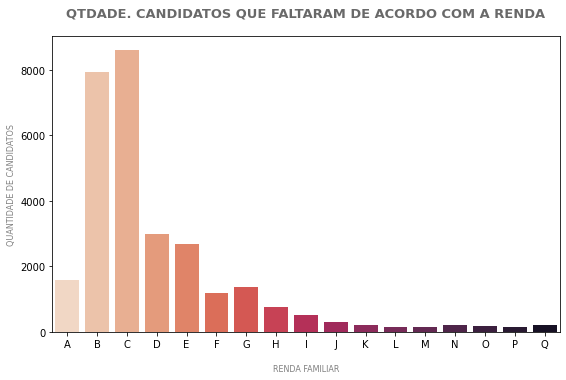

In [ ]:
# Plot quantidade de canditados que faltaram de acordo com a renda familia.

plt.figure(figsize=(20, 25))
order = dados_pessoas_faltantes['Q006'].sort_values().unique()
ax0 = plt.subplot(4, 2, 2)
ax0 = sns.countplot(x = 'Q006',data = dados_pessoas_faltantes, dodge = False, palette='rocket_r', order=order)
ax0 = plt.title('QTDADE. CANDIDATOS QUE FALTARAM DE ACORDO COM A RENDA', pad = 20, fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax0 = plt.xlabel('RENDA FAMILIAR', color = 'grey', labelpad = 15, fontsize = 8)
ax0 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', fontsize = 8)


**Dicionario de dados renda:**

    A -> sem renda.
    B -> Até R$ 998,00
    C -> De R$ 998,01 até R$ 1.497,00.
    D -> De R$ 1.497,01 até R$ 1.996,00.
    E -> De R$ 1.996,01 até R$ 2.495,00.
    F -> De R$ 2.495,01 até R$ 2.994,00.
    G -> De R$ 2.994,01 até R$ 3.992,00.
    H -> De R$ 3.992,01 até R$ 4.990,00.
    I -> De R$ 4.990,01 até R$ 5.988,00.
    J -> De R$ 5.988,01 até R$ 6.986,00.
    K -> De R$ 6.986,01 até R$ 7.984,00.
    L -> De R$ 7.984,01 até R$ 8.982,00.
    M -> De R$ 8.982,01 até R$ 9.980,00.
    N -> De R$ 9.980,01 até R$ 11.976,00.
    O -> De R$ 11.976,01 até R$ 14.970,00.
    P -> De R$ 14.970,01 até R$ 19.960,00.
    Q -> Mais de R$ 19.960,00.


**Conclusões**

    1 - O numero de pessoas que faltaram é maior no primeiro dia de prova.
    2 - O numero de pessoas eliminadas é maior no segundo dia de prova. 
    3 - A maioria das pessoas que faltaram a prova não possuem nem carro e nem moto.
    4 - Pessoas com renda baixa foram as que mais faltaram.





### NOTAS

In [ ]:
# Criação da coluna com a soma das notas.
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


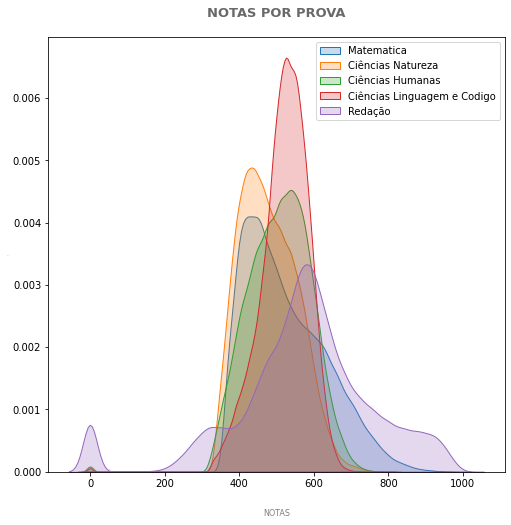

In [ ]:
# Nota das provas

plt.figure(figsize=(18,8))
shape = dados.shape
ax = plt.subplot(1, 2, 1)

sns.kdeplot(dados['NU_NOTA_MT'], label = 'Matematica', shade = True, data = dados)
sns.kdeplot(dados['NU_NOTA_CN'], label = 'Ciências Natureza', shade = True, data = dados)
sns.kdeplot(dados['NU_NOTA_CH'], label = 'Ciências Humanas', shade = True, data = dados)
sns.kdeplot(dados['NU_NOTA_LC'], label = 'Ciências Linguagem e Codigo', shade = True, data = dados)
sns.kdeplot(dados['NU_NOTA_REDACAO'], label = 'Redação', shade = True, data = dados)

plt.title('NOTAS POR PROVA', pad = 20, fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('NOTAS', color = 'grey', labelpad = 20, fontsize = 8)
plt.ylabel([], fontsize =0)

ax = plt.legend()

In [ ]:
# Porque as pessoas zeram redação
dados_status_redacao_zero = dados.query('NU_NOTA_REDACAO == 0')['TP_STATUS_REDACAO']

# Alteração dos nomes.
dados_status_redacao_zero.replace(1.0, 'Sem problema', inplace = True)
dados_status_redacao_zero.replace(2.0, 'Anulada', inplace = True)
dados_status_redacao_zero.replace(3.0, 'Cópia Texto Motivador', inplace = True)
dados_status_redacao_zero.replace(4.0, 'Em branco', inplace = True)
dados_status_redacao_zero.replace(6.0, 'Fuga ao tema', inplace = True)
dados_status_redacao_zero.replace(7.0, 'Não etendimento ao tipo textual', inplace = True)
dados_status_redacao_zero.replace(8.0, 'Texto insuficiente', inplace = True)
dados_status_redacao_zero.replace(9.0, 'Parte desconectada', inplace = True)

# Criação dataframe
df_dados_status_redacao_zero = pd.DataFrame(dados_status_redacao_zero.value_counts())

# Alteração do nome da coluna.
df_dados_status_redacao_zero.columns.name = 'Motivo das notas zero'
df_dados_status_redacao_zero.rename(columns={'TP_STATUS_REDACAO': 'Qtd de pessoas'})


Motivo das notas zero,Qtd de pessoas
Em branco,1444
Fuga ao tema,914
Cópia Texto Motivador,550
Texto insuficiente,217
Anulada,144
Parte desconectada,134
Não etendimento ao tipo textual,102


In [ ]:
# As pessoas que zeram a redação são de escolas publicas?

dados_zero_redacao = dados.query('NU_NOTA_REDACAO == 0')

# Alteração do nomes de acordo com o dicionario de dados.
dados_zero_redacao.replace(1, 'Não Respondeu', inplace = True)
dados_zero_redacao.replace(2, 'Pública', inplace = True)
dados_zero_redacao.replace(3, 'Privada', inplace = True)

# Criação dataframe
df_dados_zero_redacao = pd.DataFrame(dados_zero_redacao['TP_ESCOLA'].value_counts())

# Alteração do nome da coluna.
df_dados_zero_redacao.rename(columns={'TP_ESCOLA': 'Qtd de pessoas'})


,Qtd de pessoas
Não Respondeu,2200
Pública,1268
Privada,37


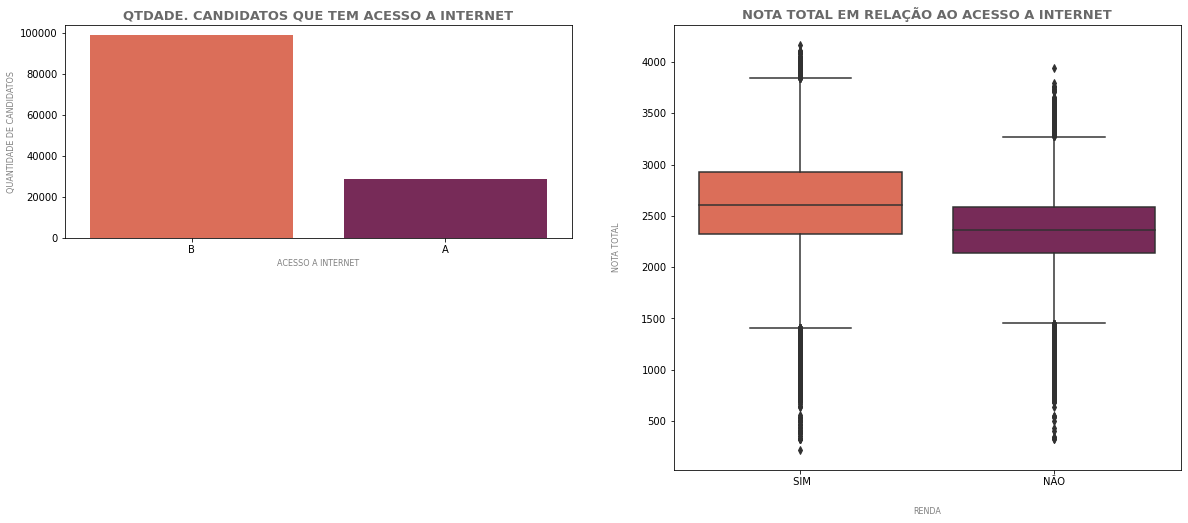

In [ ]:
# Quantidade de pessoas que tem acesso a internet.

dados_acesso_internet = dados['Q025']

plt.figure(figsize=(20,18))
ax0 = plt.subplot(4, 2, 1)
ax0 = sns.countplot(x = 'Q025',data = dados, dodge = False, palette='rocket_r')
ax0 = plt.title('QTDADE. CANDIDATOS QUE TEM ACESSO A INTERNET', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax0 = plt.xlabel('ACESSO A INTERNET', color = 'grey', fontsize = 8)
ax0 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', fontsize = 8)

# Boxplot nota total em relação ao acesso a internet.
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
internet = dados_sem_notas_zero[['Q025', 'NU_NOTA_TOTAL']]
internet.replace('A', 'NÃO', inplace = True)
internet.replace('B', ' SIM', inplace = True)

plt.subplot(2, 2, 2)

ax1 = sns.boxplot(x='Q025', y ='NU_NOTA_TOTAL', data = internet, palette = 'rocket_r')
ax1 = plt.title('NOTA TOTAL EM RELAÇÃO AO ACESSO A INTERNET', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax1 = plt.xlabel('RENDA', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)


**Dicionario de dados**

    ->Status da redação
    1 -> sem problema
    2 -> Anulada
    3 -> Cópia Texto Motivador
    4 -> Em branco
    6 -> Fuga ao tema
    7 -> Não etendimento ao tipo textual
    8 -> Texto insuficiente
    9 -> Parte desconectada.

    ->Tipo de escolaridade
    1 -> Não respondeu
    2 -> Pública
    3 -> Privada
    4 -> Exterior

    -> Acesso a internet
    A -> Não
    B -> Sim
    
**Conclusões**

    1 - A maioria das pessoas tiram zero na redação é porque deixam em branco ou fogem do tema.
    2 - Grande parte das pessoas que zeraram a redação são de escolas públicas.
    3 - Redação é a materia com mais notas baixas.
    4 - As maiores notas são de pessoas que possuem acesso a internet.
   



### RAÇA

In [ ]:
dados_raça = dados['TP_COR_RACA']

# Alteração dos nome de acordo com o dicionairo de dados.
dados_raça.replace(0, 'Não declarado', inplace = True)
dados_raça.replace(1, 'Branca', inplace = True)
dados_raça.replace(2, 'Preta', inplace = True)
dados_raça.replace(3, 'Parda', inplace = True)
dados_raça.replace(4, 'Amarela', inplace = True)
dados_raça.replace(5, 'Indígena', inplace = True)

# Criação dataframe.
df_dados_raça = pd.DataFrame(dados_raça.value_counts())

# Alteração do nome da coluna.
df_dados_raça.rename(columns={'TP_COR_RACA': 'Qtd de pessoas'})


,Qtd de pessoas
Parda,59132
Branca,45616
Preta,16300
Amarela,2975
Não declarado,2565
Indígena,792


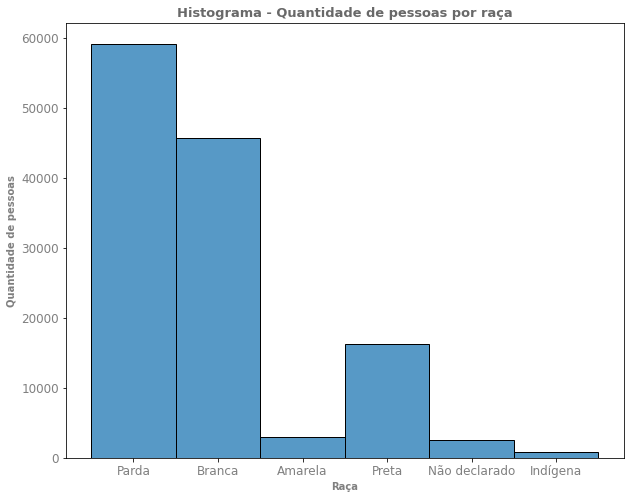

In [ ]:
# Histograma quantiade de pessoas por raça
plt.figure(figsize=(10,8))
ax0 = sns.histplot(x='TP_COR_RACA', data=dados)
ax0 = plt.title("Histograma - Quantidade de pessoas por raça", fontsize=13, color='dimgrey', fontweight='bold')
ax0 = plt.xlabel("Raça", fontsize=10, color='grey', fontweight='bold')
ax0 = plt.ylabel("Quantidade de pessoas", fontsize=10, color='grey', fontweight='bold')
ax0 = plt.xticks(color = 'grey', fontsize = 12)
ax0 = plt.yticks(color = 'grey', fontsize = 12)

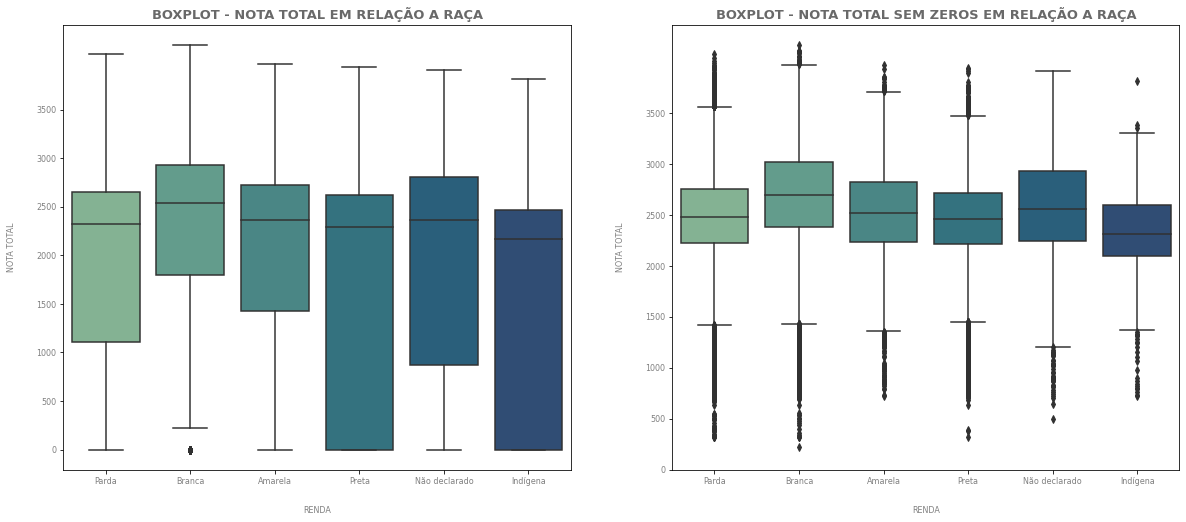

In [ ]:
# Nota total em relação a raça
plt.figure(figsize=(20,18))

plt.subplot(2, 2, 1)
ax0 = sns.boxplot(x='TP_COR_RACA', y ='NU_NOTA_TOTAL', data = dados, palette = 'crest')
ax0 = plt.title('BOXPLOT - NOTA TOTAL EM RELAÇÃO A RAÇA', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax0 = plt.xlabel('RENDA', color = 'grey', labelpad = 20, fontsize = 8)
ax0 = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)
ax0 = plt.xticks(color = 'grey', fontsize = 8)

# Alterando a escala do eixo y (posicao inicial, posicao final, intervalo)
ax0 = y_ticks = np.arange(0, 4000, 500)
ax0 = plt.yticks(y_ticks, color = 'grey', fontsize = 8)

# Nota total diferente de zero em relação a raça
dados_nota_sem_zero = dados.query('NU_NOTA_TOTAL != 0')

plt.subplot(2, 2, 2)
ax1 = sns.boxplot(x='TP_COR_RACA', y ='NU_NOTA_TOTAL', data = dados_nota_sem_zero, palette = 'crest')
ax1 = plt.title('BOXPLOT - NOTA TOTAL SEM ZEROS EM RELAÇÃO A RAÇA', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax1 = plt.xlabel('RENDA', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.xticks(color = 'grey', fontsize = 8)

# Alterando a escala do eixo y (posicao inicial, posicao final, intervalo)
ax1 = y_ticks = np.arange(0, 4000, 500)
ax1 = plt.yticks(y_ticks, color = 'grey', fontsize = 8)


In [ ]:
# Comparação da raça e a classe social.
pd.crosstab(index = dados['Q006'], columns=dados['TP_COR_RACA'])

TP_COR_RACA,Amarela,Branca,Indígena,Não declarado,Parda,Preta
Q006,,,,,,
A,133,1155,85,158,3357,952
B,832,6596,293,624,18321,5124
C,822,9510,226,605,16374,5057
D,285,4731,58,269,5663,1549
E,239,4890,66,210,5099,1359
F,122,2693,15,104,2191,515
G,154,3777,17,153,2778,648
H,82,2656,8,97,1606,367
I,69,2002,9,69,1157,246


**Conclusões**

    1 - A quantidade de inscritos nesta amostra consegue atestar que a quantidade de pessoas de raça parda e branca é muito maior do que as outras raças.
    2 - As pessoas de raça branca apresenta notas maiores do que as outras raças.
    3 - Quanto maior a renda, menor o número de pessoas de raça preta.
    4 - A raça preta e a raça parda são mais presentes nas classes sociais mais baixas.


### SEXO

In [ ]:
# Quantidade de pessoas por sexo.
df_dados_sexo = pd.DataFrame(dados['TP_SEXO'].value_counts())
df_dados_sexo

,TP_SEXO
F,75883
M,51497


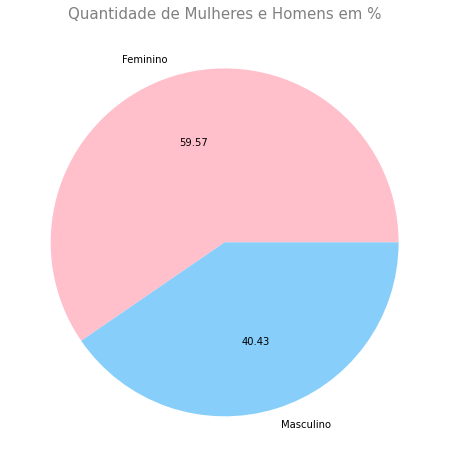

In [ ]:
# Plot da quantidade de pessoas por sexo.
plt.figure(figsize=(18,8))
values = [df_dados_sexo.TP_SEXO.count()] 
labels = ['Feminino', 'Masculino'] 
plt.pie(x = df_dados_sexo, labels=labels, autopct='%.2f', colors=['pink', 'lightskyblue'])
plt.title("Quantidade de Mulheres e Homens em %", fontsize=15, color='grey')
plt.show()

Text(0, 0.5, 'NOTA TOTAL')

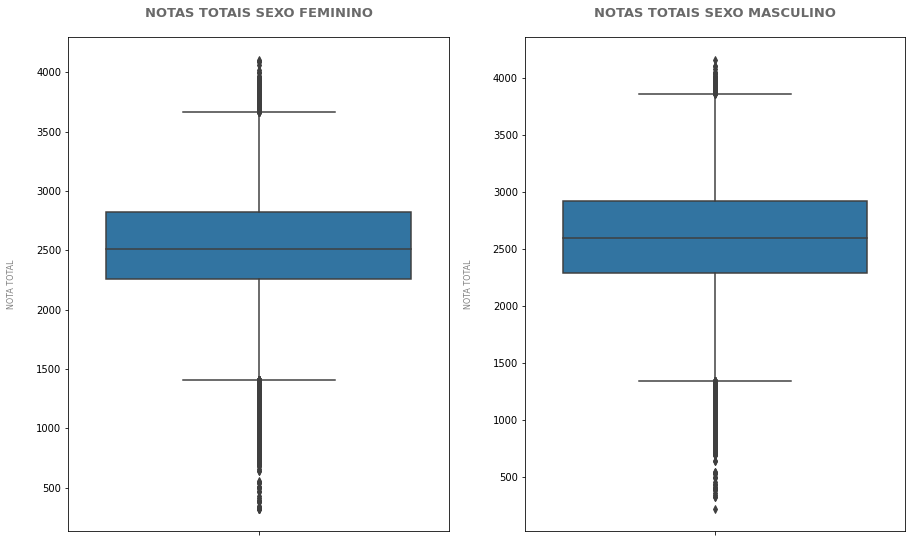

In [ ]:
# Notas em relação ao sexo

dados_sem_notas_zero = dados.query('NU_NOTA_TOTAL != 0')
dados_notas_mulheres = dados_sem_notas_zero.query('TP_SEXO == "F"')
dados_notas_homens = dados_sem_notas_zero.query('TP_SEXO == "M"')

plt.figure(figsize=(15,20))

# Boxplot sexo feminino
ax = plt.subplot(2, 2, 1)
ax = sns.boxplot(y = dados_notas_mulheres['NU_NOTA_TOTAL'],data = dados_notas_mulheres, hue = 'NU_NOTA_TOTAL')
ax = plt.title('NOTAS TOTAIS SEXO FEMININO', pad = 20, fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax = plt.xlabel('', fontsize=0 )
ax = plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)

# Boxplot sevo masculino
ax1 = plt.subplot(2, 2, 2)
ax1 = sns.boxplot(y = dados_notas_homens['NU_NOTA_TOTAL'],  data = dados_notas_homens, hue = 'NU_NOTA_TOTAL')
plt.title('NOTAS TOTAIS SEXO MASCULINO', pad = 20, fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('', fontsize=0)
plt.ylabel('NOTA TOTAL', color = 'grey', labelpad = 20, fontsize = 8)

In [ ]:
dados_notas_mulheres['NU_NOTA_TOTAL'].mean()
dados_notas_homens['NU_NOTA_TOTAL'].mean()

display(dados_notas_mulheres['NU_NOTA_TOTAL'].mean())
display(dados_notas_homens['NU_NOTA_TOTAL'].mean())

2515.627871148458

2581.898167380908

**Conclusões**

    1 - O número de mulheres realizando a prova é superior ao número de homens.
    2 - A diferença das notas entre homens e mulheres tem uma pequena diferença onde a media das mulheres é 2516 e dos homens 2582

# DESAFIO 01

Desafio 01: Proporção dos inscritor por idade

Desafio 02: Descobrir de quais estados são os inscritos com 13 anos.

Desafio 03: Adicionar titulo no histograma;

Desafio 04: Plotar os histogramas das idades dos  treineiros e não treineiros ( um em cima do outro )

Desafio 05: comparar as distribuição das provas em ingles e espanhol. (query)

desafio 06: explorar a documentações e visualizações (matplotlib ou pandas.)

In [ ]:
# Desafio 01: Proporção dos inscritor por idade
df_dados_proporcao = pd.DataFrame(dados["NU_IDADE"].value_counts(normalize = True)* 100)
df_dados_proporcao.head()

,NU_IDADE
18,16.840948
17,16.687078
19,11.318888
20,8.174753
16,6.146962


In [ ]:
# Desafio 02: Descobrir de quais estados são os inscritos com 13 anos.
dados.query('NU_IDADE == 13')['SG_UF_RESIDENCIA'].value_counts()

AP    1
BA    1
MT    1
SP    1
Name: SG_UF_RESIDENCIA, dtype: int64

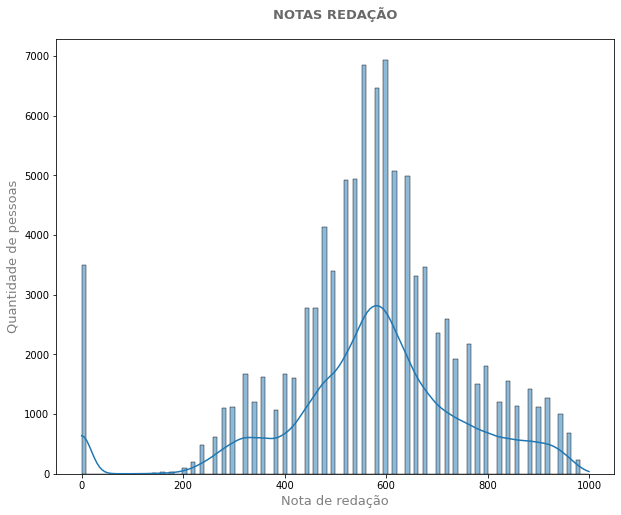

In [ ]:
# Desafio 03: Adicionar titulo no histograma;

plt.figure(figsize=(10,8))

ax = sns.histplot(data=dados, x='NU_NOTA_REDACAO', kde=True)
ax = plt.title('NOTAS REDAÇÃO', pad = 20, fontsize = 13, color = 'dimgrey', fontweight = 'bold')
ax = plt.xlabel('Nota de redação', fontsize = 13, color = 'grey')
ax = plt.ylabel('Quantidade de pessoas', fontsize = 13, color = 'grey')


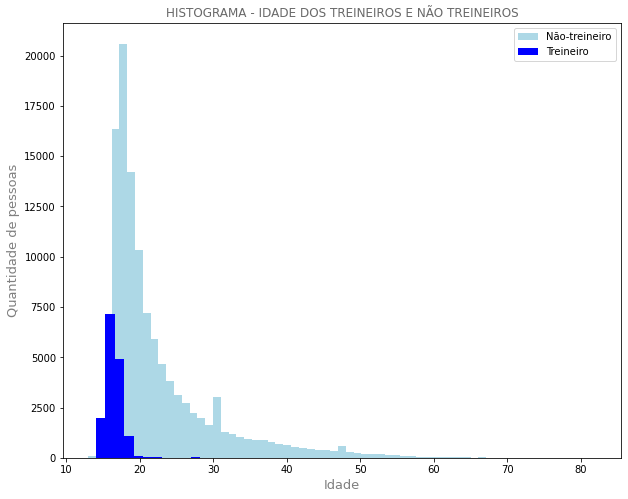

In [ ]:
# Desafio 04: Plotar os histogramas das idades dos  treineiros e não treineiros (um em cima do outro).

dados.query("IN_TREINEIRO == 0")["NU_IDADE"].hist(bins=65, figsize=(10,8), color="lightblue", label="Não-treineiro", grid=False).set_title("HISTOGRAMA - IDADE DOS TREINEIROS E NÃO TREINEIROS", color = 'dimgrey')
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].hist(bins=37, figsize=(10,8), color="blue", label="Treineiro", grid=False)   
plt.xlabel('Idade', fontsize = 13, color = 'grey')
plt.ylabel('Quantidade de pessoas', fontsize = 13, color = 'grey')
plt.legend()

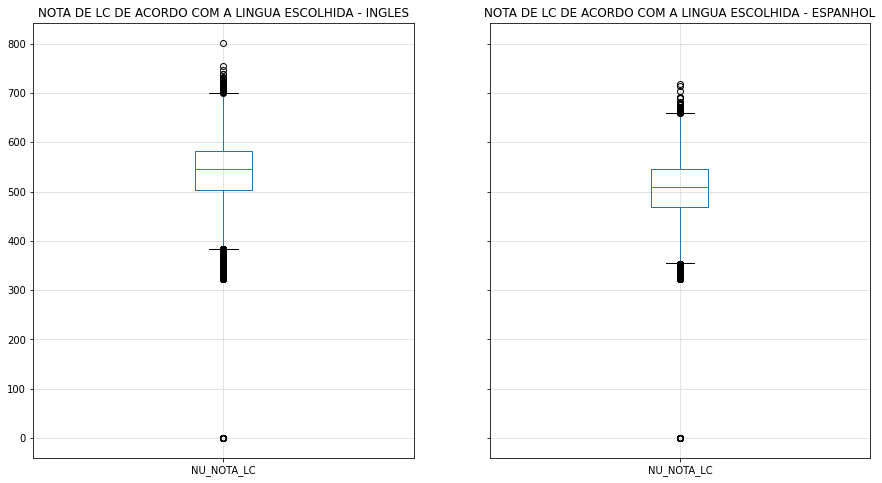

In [ ]:
# Desafio 05: comparar as distribuição das provas em ingles e espanhol. (query)

ingles = dados.query('TP_LINGUA == 0')
espanhol = dados.query('TP_LINGUA == 1')

fig, (ax1, ax2) = plt.subplots(1, 2, sharey = (True), figsize=(15,8))
ingles['NU_NOTA_LC'].plot.box(ax = ax1, grid=(True))
espanhol['NU_NOTA_LC'].plot.box(ax = ax2, grid=(True))
ax1.set_title('NOTA DE LC DE ACORDO COM A LINGUA ESCOLHIDA - INGLES')
ax2.set_title('NOTA DE LC DE ACORDO COM A LINGUA ESCOLHIDA - ESPANHOL')
ax1.grid(True, zorder = 0, linestyle = '--', linewidth = 0.5)
ax2.grid(True, zorder = 0, linestyle = '--', linewidth = 0.5)

# DESAFIO 02


MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos

Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.

Desafio 3: Criar uma função para plotar o boxplot do seaborn

Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

In [ ]:
# MEGA DESAFIO DA THAINÁ: Pegar a amostra completa dos alunos de 13 e 14 anos

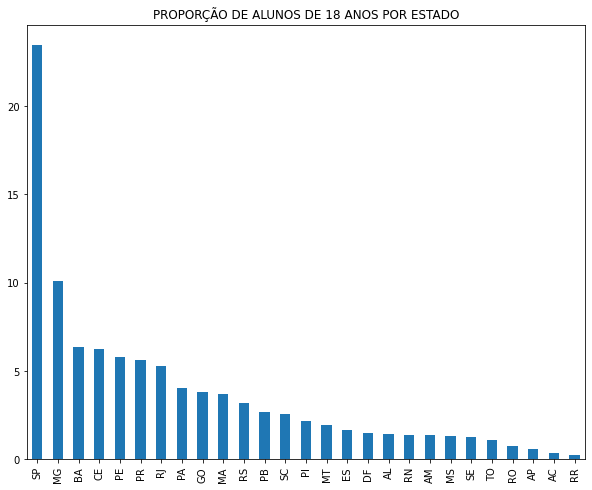

In [ ]:
# Desafio do Gui bonzinho: aumentar a amostra para alunos menor de idade e compara a proporção por estado.

amostra_maior_dezoito = dados.query('NU_IDADE < 18')['SG_UF_RESIDENCIA'].value_counts(normalize = True)*100

amostra_maior_dezoito.plot.bar(figsize=(10,8), title = "PROPORÇÃO DE ALUNOS DE 18 ANOS POR ESTADO")

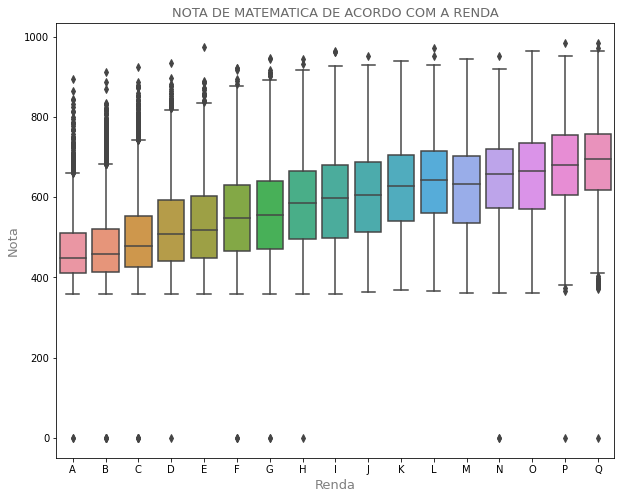

In [ ]:
# Desafio 3: Criar uma função para plotar o boxplot do seaborn

# Função para plotar.
def plotBoxplotSeaborn(renda, datas_y, dadosEnem, title=''):
  order = dadosEnem[renda].sort_values().unique()
  plt.figure(figsize=(10,8))
  plot_boxplot = sns.boxplot(x=renda, y=datas_y, data=dadosEnem, order=order)
  plt.xlabel('Renda', fontsize = 13, color = 'grey')
  plt.ylabel('Nota', fontsize = 13, color = 'grey')
  plt.title(title, color = 'dimgrey', fontsize = 13)
  
  return plot_boxplot
# Chamar a função
plotBoxplotSeaborn('Q006', 'NU_NOTA_MT', dados, title='NOTA DE MATEMATICA DE ACORDO COM A RENDA')


In [ ]:
# Desafio 4: Verificar se quem zerou a prova foi eliminado ou não estava presente

# Juntando todas as notas 
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

#Presença nas provas
presencas = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']
dados_nota_zero = dados.query('NU_NOTA_TOTAL == 0')

dados_faltou_prova = dados_nota_zero.query('TP_PRESENCA_CN == 0 and TP_PRESENCA_CH == 0 and TP_PRESENCA_LC == 0 and TP_PRESENCA_MT == 0')
dados_eliminado_prova = dados_nota_zero.query('TP_PRESENCA_CN == 2 or TP_PRESENCA_CH == 2 or TP_PRESENCA_LC == 2 or TP_PRESENCA_MT == 2')

# Saber quantos faltaram.
Faltou_prova = dados_faltou_prova['NU_INSCRICAO'].count()

# Saber quantos eliminados.
Eliminado_prova = dados_eliminado_prova['NU_INSCRICAO'].count()

# Criação do DataFrame.
df_eliminado_ou_npresente = pd.DataFrame({'Informação': ['Faltou a prova', 'Eliminado na prova'], 'Total de Pessoas': [Faltou_prova, Eliminado_prova]})

# Alterar o titulo do id.
df_eliminado_ou_npresente.columns.name = 'ID' # botar titulo no INDEX.

# Alterar os valores id.
df_eliminado_ou_npresente.index = [0, 2]

df_eliminado_ou_npresente


ID,Informação,Total de Pessoas
0,Faltou a prova,28998
2,Eliminado na prova,120


In [ ]:
# Desafio 5: Quem é eliminado tira zero ou será NaN (não teve registro de notas)

dados_nota_zero.query('TP_PRESENCA_CN == 2 or TP_PRESENCA_CH == 2 or TP_PRESENCA_LC == 2 or TP_PRESENCA_MT == 2')[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
77,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN,NaN
446,NaN,NaN,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
124695,NaN,NaN,NaN,NaN,NaN
125216,NaN,NaN,NaN,NaN,NaN
125784,NaN,NaN,NaN,NaN,NaN
126769,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Renda')

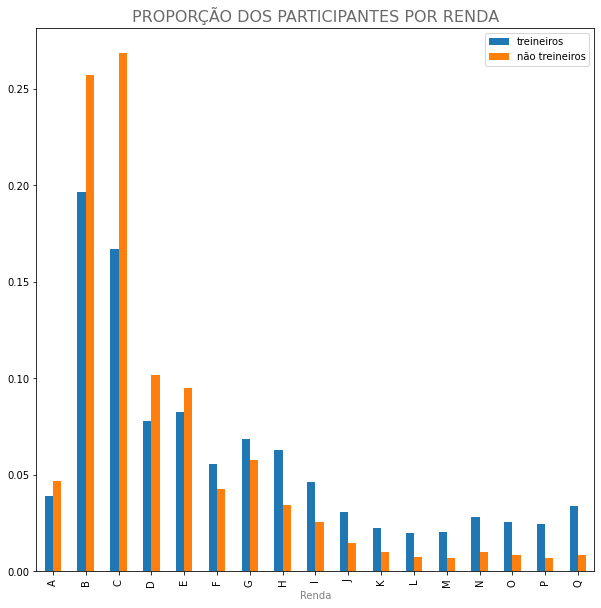

In [ ]:
# Desafio 6: Verificar a proporção dos participantes de rendas mais altas e mais baixas como treineiro e não treineiro.

dados_renda_treineiro = dados.query('IN_TREINEIRO == 1')['Q006'].value_counts(normalize=True).sort_index()
dados_renda_n_treineiro = dados.query('IN_TREINEIRO == 0')['Q006'].value_counts(normalize=True).sort_index()

# Criação DataFrame.
df_renda_treineiro_ntreineiro = pd.DataFrame({'treineiros':dados_renda_treineiro, 'não treineiros': dados_renda_n_treineiro})

# Plotar grafico de barra
ax = df_renda_treineiro_ntreineiro.plot.bar(figsize=(10,10))

# Titulo
ax.set_title('PROPORÇÃO DOS PARTICIPANTES POR RENDA', fontsize=16, color = 'dimgrey')
plt.xlabel("Renda", color = 'grey' )

Text(0.5, 1.0, 'BOXPLOT - NOTA DAS PESSOAS COM ACESSO A INTERNET')

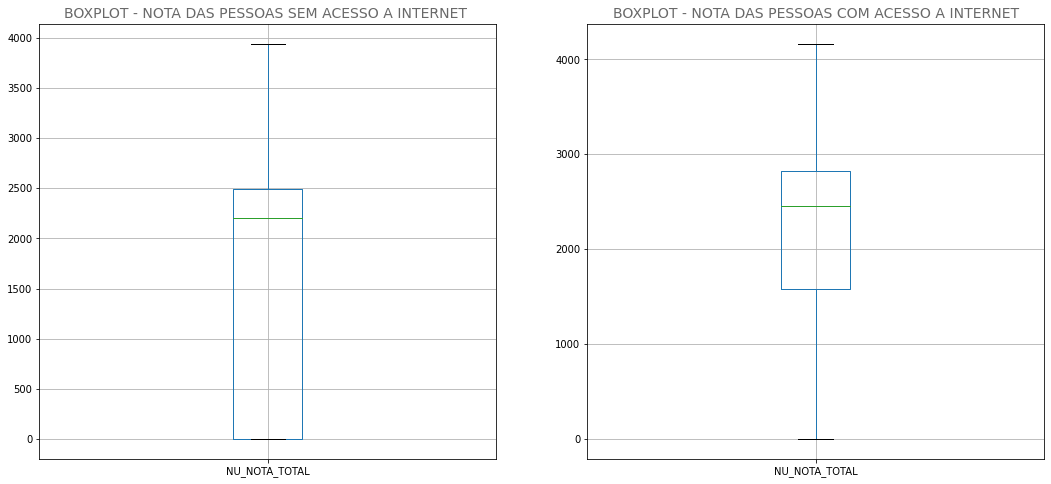

In [ ]:
# Desafio 7: Fazer o mesmo boxplot olhando para a questão 25 (tem internet ou não) e fazer uma reflexão sobre o assunto e o contexto de pandemia.

# Dados sem acesso a internet
dados_sem_internet = dados.query('Q025=="A"')['NU_NOTA_TOTAL']

# Dados com acesso a internet
dados_com_internet = dados.query('Q025=="B"')['NU_NOTA_TOTAL']

# Plot boxplots.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))
dados_sem_internet.plot.box(ax = ax1, grid=(True))
dados_com_internet.plot.box(ax = ax2, grid=(True))
ax1.set_title('BOXPLOT - NOTA DAS PESSOAS SEM ACESSO A INTERNET ', fontsize=14, color = 'dimgrey')
ax2.set_title('BOXPLOT - NOTA DAS PESSOAS COM ACESSO A INTERNET', fontsize=14, color = 'dimgrey')


# DESAFIO 03

Desafio: Plotar as médias, medianas e moda nas notas de LC e MT (matiplotlib linha vertical)

Desafio2: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.

Desafio3: Filtrar as notas por seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral.

Desafio4: Pensar sobre a correlação entre matemática e Linguagens.

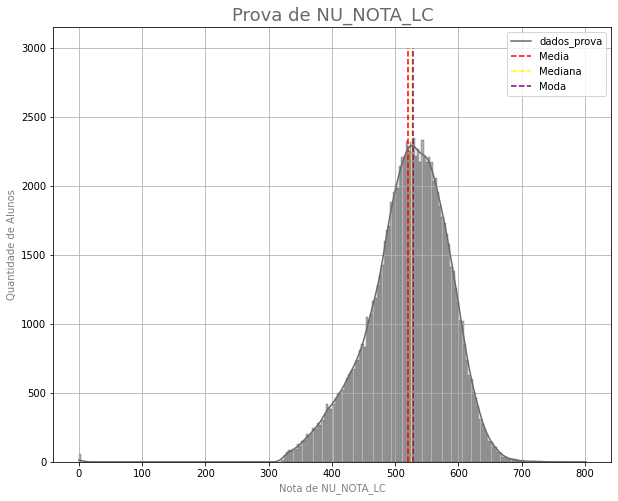

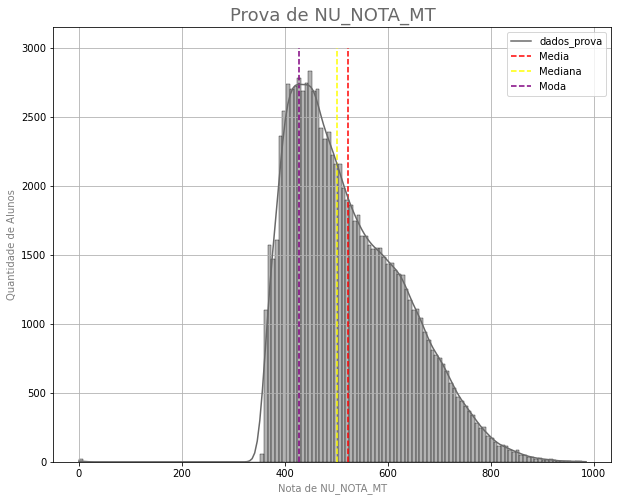

In [ ]:
# Desafio: Plotar as médias, medianas e moda nas notas de LC e MT (matiplotlib linha vertical)

# Dados sem notas zero.
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

# Plot das medias, medianas e moda.
def plotar_media_mediana_moda(dataset, prova):

  media = dataset[prova].mean()
  mediana = dataset[prova].median()
  moda = dataset[prova].mode()

  plt.figure(figsize=(10,8))

  grafico_hist = sns.histplot(dataset, x=prova, kde=True, color = "dimgrey", alpha=0.5)
  linha1 = plt.vlines(x=media, ymin=0, ymax=3000, colors="red", linestyles="dashed")
  linha2 = plt.vlines(x=mediana, ymin=0, ymax=3000, color="yellow", linestyles="dashed")
  linha3 = plt.vlines(x=moda, ymin=0, ymax=3000, color="purple", linestyles="dashed")

  grafico_hist.legend(labels=('dados_prova','Media','Mediana','Moda'))
  plt.title('Prova de {}'.format(prova), fontdict = {'fontsize': 18}, color = 'dimgrey')
  plt.xlabel('Nota de {}'.format(prova), color = 'grey')
  plt.ylabel('Quantidade de Alunos', color = 'grey')

  plt.grid()

# Chamar a função.
plotar_media_mediana_moda(dados_sem_notas_zero, "NU_NOTA_LC")
plotar_media_mediana_moda(dados_sem_notas_zero, "NU_NOTA_MT")

Text(0.5, 1.0, 'Grafico de Correalação Notas Enem')

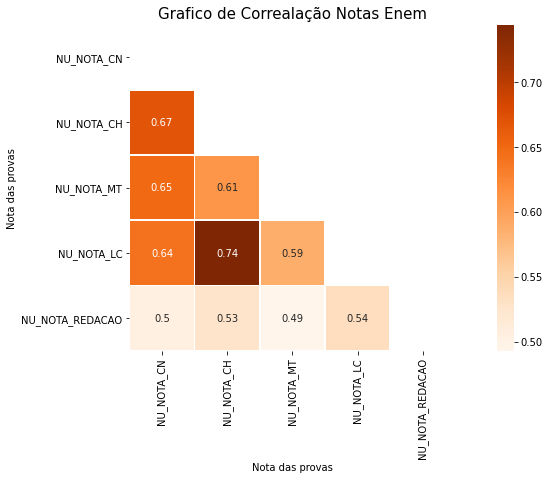

In [ ]:
# Desafio2: Melhorar a visualização da matriz de correlação e analisar mais detalhadamente.

correlacao = dados_sem_notas_zero[provas].corr() #formato do graf

plt.figure(figsize=(15,6))
mask = np.triu(np.ones_like(correlacao, dtype=bool))
grafico_corr = sns.heatmap(correlacao, cmap="Oranges", annot=True, mask=mask, square=True, linecolor='white', linewidths=.6) 
grafico_corr.set_xlabel("Nota das provas")
grafico_corr.set_ylabel("Nota das provas")
plt.title("Grafico de Correalação Notas Enem", fontdict= {'fontsize': 15})


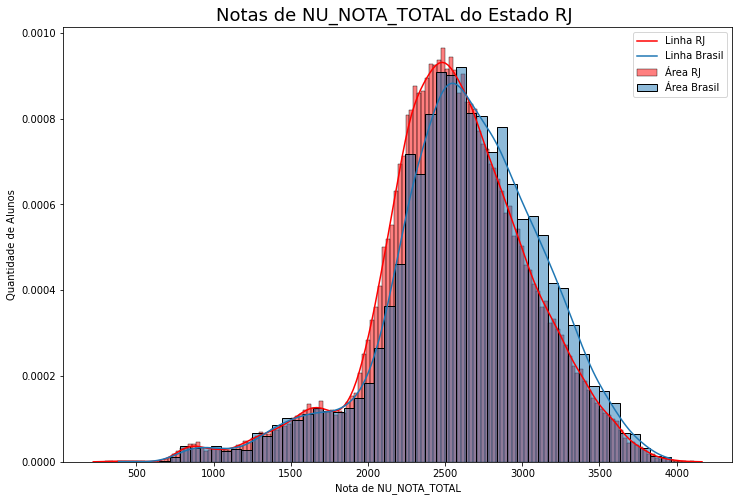

In [ ]:
# Desafio3: Filtrar as notas por seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral.

# Função para plotar notas por estado.
def plotar_notas_por_estado(estado, prova):

  plt.figure(figsize=(12,8))
  dado_estado = dados_sem_notas_zero.query("SG_UF_RESIDENCIA == '{}'".format(estado))

  sns.histplot(dados_sem_notas_zero, x=prova, stat="density",color='red',kde=True)
  grafico_hist = sns.histplot(dado_estado ,x = prova, kde=True, stat="density")
  grafico_hist.legend(labels=('Linha {}'.format(estado),'Linha Brasil','Área {}'.format(estado),'Área Brasil'))
  plt.title('Notas de {} do Estado {} '.format( prova, estado), fontdict = {'fontsize': 18})
  plt.xlabel('Nota de {}'.format(prova))
  plt.ylabel('Quantidade de Alunos')
 
# Chamar a função
plotar_notas_por_estado('RJ', 'NU_NOTA_TOTAL')



(350.0, 1050.0)

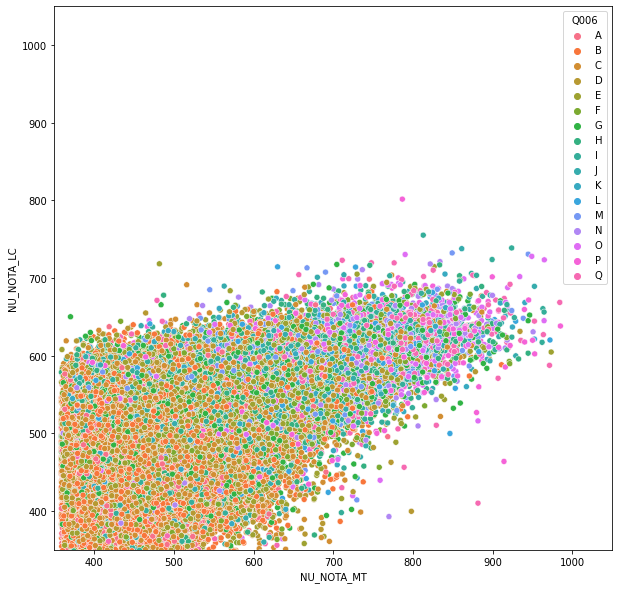

In [ ]:
# Desafio4: Pensar sobre a correlação entre matemática e Linguagens.

classes_renda = dados_sem_notas_zero["Q006"].unique()
classes_renda.sort()
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_sem_notas_zero, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q006", hue_order=classes_renda)
plt.xlim((350, 1050))
plt.ylim((350, 1050))

É possivel observar que as notas sobem de acordo com a renda, sendo A renda mais baixa e Q a renda mais alta. Mesmo as notas mais altas estando agrupadas nas rendas mais altas, existem algumas pessoas as quais são consideradas fora do padrão que mesmo tendo renda baixa apresentam uma nota alta. 

# DESAFIO 04

Desafio01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula

Desafio02: Ler a documentação do Dummy e alterar o método de regressão

Desafio03: Buscar outra métrica para avaliar modelos de regressão

## Modelos criados em sala

In [ ]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[prova_saida]

x = notas_entrada
y = notas_saida 

In [ ]:
SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, random_state=SEED)

In [ ]:
modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [ ]:
predicoes_matematica = modelo.predict(x_teste)

In [ ]:
mse_LSVR = mean_squared_error(y_teste, predicoes_matematica)

In [ ]:
r2_score_LSVR = r2_score(y_teste, predicoes_matematica)

In [ ]:
mae_LSVR = mae(y_teste, predicoes_matematica)

In [ ]:
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

In [ ]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2
resultados

,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,564.486105,-104.786105,10980.127878
104685,617.2,628.305027,-11.105027,123.321625
91028,520.0,509.980986,10.019014,100.380650
115802,703.8,593.681144,110.118856,12126.162420
93303,627.1,579.784588,47.315412,2238.748252
...,...,...,...,...
81393,688.6,626.291851,62.308149,3882.305380
40159,479.1,652.313922,-173.213922,30003.062777
64083,501.4,607.787172,-106.387172,11318.230438
84661,772.5,734.227663,38.272337,1464.771772


In [ ]:
resultados["quadrado_diferenca"].mean()

6604.415306219529

In [ ]:
resultados["quadrado_diferenca"].mean()**(1/2)

81.26755383435341

In [ ]:
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [ ]:
mean_squared_error(y_teste, dummy_predicoes)

12063.645588509502

In [ ]:
mse_dummy = mean_squared_error(y_teste, dummy_predicoes)

In [ ]:
r2_score_dummy = r2_score(y_teste, dummy_predicoes)

In [ ]:
mae_dummy = mae(y_teste, dummy_predicoes)

## Resolução dos desafios

**BayesianRidge**

In [ ]:
# Desafio01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula

modelo_bayesian = ML.BayesianRidge()
modelo_bayesian.fit(x_treino, y_treino)

predicoes_bayensian = modelo_bayesian.predict(x_teste)


In [ ]:
# Metricas 
  
mse_bayensian = mean_squared_error(y_teste, predicoes_bayensian)
r2_score_bayensian = r2_score(y_teste, predicoes_bayensian)
mae_bayensian = mae(y_teste, predicoes_bayensian)

**Linear Regression**

In [ ]:
modelo_LinearRegression = ML.LinearRegression()
modelo_LinearRegression.fit(x_treino, y_treino)

predicoes_LinearRegression = modelo_LinearRegression.predict(x_teste)

In [ ]:
# Metricas 

mse_LR = mean_squared_error(y_teste, predicoes_LinearRegression)
r2_score_LR = r2_score(y_teste, predicoes_LinearRegression)
mae_LR = mae(y_teste, predicoes_LinearRegression)

**RidgeCV**

In [ ]:
modelo_RidgeCV = ML.RidgeCV()
modelo_RidgeCV.fit(x_treino, y_treino)

predicoes_RidgeCV = modelo_RidgeCV.predict(x_teste)

In [ ]:
# Metricas

mse_RidgeCV = mean_squared_error(y_teste, predicoes_RidgeCV)
r2_score_RidgeCV = r2_score(y_teste, predicoes_RidgeCV)
mae_RidgeCV = mae(y_teste, predicoes_RidgeCV)

**<h2>Comparação dos modelos</h2>**

In [ ]:
# Comparação dos modelos em relação a previsões das notas

comparacao_modelos_previsoes = pd.DataFrame()
comparacao_modelos_previsoes["Real"] = y_teste
comparacao_modelos_previsoes['Previcao_LinearSVR'] = predicoes_matematica.round(1)
comparacao_modelos_previsoes['Previcao_DummyRegressor'] = dummy_predicoes.round(1)
comparacao_modelos_previsoes['Previcao_bayensian'] = predicoes_bayensian.round(1)
comparacao_modelos_previsoes['Previcao_LinearRegression'] = predicoes_LinearRegression.round(1)
comparacao_modelos_previsoes

,Real,Previcao_LinearSVR,Previcao_DummyRegressor,Previcao_bayensian,Previcao_LinearRegression
114991,459.7,564.5,523.3,538.0,538.0
104685,617.2,628.3,523.3,609.7,609.7
91028,520.0,510.0,523.3,487.4,487.4
115802,703.8,593.7,523.3,569.1,569.1
93303,627.1,579.8,523.3,561.3,561.3
...,...,...,...,...,...
81393,688.6,626.3,523.3,602.3,602.3
40159,479.1,652.3,523.3,629.3,629.3
64083,501.4,607.8,523.3,584.2,584.2
84661,772.5,734.2,523.3,720.9,720.9


In [ ]:
# Comparação dos modelos em relação as metricas

metricas = {"modelos":["LinearSVR", "DummyRegressor", "Bayensian", "LinearRegression", "RidgeCV"],
         "mean_absolute_error":[mae_LSVR, mae_dummy, mae_bayensian, mae_LR, mae_RidgeCV],
         "mean_squared_error":[mse_LSVR, mse_dummy, mse_bayensian, mse_LR, mse_RidgeCV], 
         "r2_score":[r2_score_LSVR, r2_score_dummy, r2_score_bayensian, r2_score_LR, r2_score_RidgeCV]}

comparacao_modelos_metricas = pd.DataFrame(data = metricas)
comparacao_modelos_metricas

,modelos,mean_absolute_error,mean_squared_error,r2_score
0,LinearSVR,66.045554,6604.415306,0.452445
1,DummyRegressor,90.387175,12063.645589,-0.000165
2,Bayensian,62.333477,5961.370157,0.505758
3,LinearRegression,62.333185,5961.372212,0.505758
4,RidgeCV,62.333185,5961.372212,0.505758


In [ ]:
# Desafio02: Ler a documentação do Dummy e alterar o método de regressão

modelo_dummy2 = DummyRegressor(strategy = 'mean')
modelo_dummy2.fit(x_treino, y_treino)
dummy_predicoes2 = modelo_dummy2.predict(x_teste)

print("mean: "+str(np.around(mean_squared_error(y_teste, dummy_predicoes2),2)))

modelo_dummy3 = DummyRegressor(strategy = 'median')
modelo_dummy3.fit(x_treino, y_treino)
dummy_predicoes3 = modelo_dummy3.predict(x_teste)

print("Median: "+str(np.around(mean_squared_error(y_teste, dummy_predicoes3),2)))

mean: 12063.65
Median: 12599.97


In [ ]:
# Desafio03: Buscar outra métrica para avaliar modelos de regressão

max_error(y_teste, dummy_predicoes2).round(2)

523.34

In [ ]:
max_error(y_teste, dummy_predicoes3)

501.55

# DESAFIO 05

Desafio 01: Pesquisar sobre intervalo de confiança.

Desafio 02: Testar com outros parâmetros da árvore de decisão

Desafio 03: Procurar outras formas de realizar os ajustes de parâmetros com o Sklearn

Desafio 04: Pesquisar o que é o problema de underfit.

Desafio 05: Plotar um gráfico com test_score e train_test.

**Desafio 01: Pesquisar sobre intervalo de confiança.**

Um intervalo de confiança (IC) é um intervalo estimado de um parâmetro de interesse de uma população. Em vez de estimar o parâmetro por um único valor, é dado um intervalo de estimativas prováveis. O quanto estas estimativas são prováveis será determinado pelo coeficiente de confiança $ (1-\alpha) $, para $ \alpha \in (0, 1) $.
fonte: http://www.portalaction.com.br/inferencia/intervalo-de-confianca

In [ ]:
# Desafio 02: Testar com outros parâmetros da árvore de decisão

def regressor_arvore(nivel, num_folhas):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel, min_samples_leaf=num_folhas)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino com profundidade {nivel} e nº mínimo de folhas {num_folhas} = {(resultados['train_score']*-1).mean()} | Teste com profundidade {nivel} e nº mínimo de folhas {num_folhas} = {(resultados['test_score']*-1).mean()}\n\n")

regressor_arvore(3,2)

Treino com profundidade 3 e nº mínimo de folhas 2 = 6021.275229419075 | Teste com profundidade 3 e nº mínimo de folhas 2 = 6054.767567442072




In [ ]:
for i in range(1,5):
    for j in range(1,5):
        regressor_arvore(i,j)

Treino com profundidade 1 e nº mínimo de folhas 1 = 7844.952652412207 | Teste com profundidade 1 e nº mínimo de folhas 1 = 7857.871770206351


Treino com profundidade 1 e nº mínimo de folhas 2 = 7844.952652412207 | Teste com profundidade 1 e nº mínimo de folhas 2 = 7857.871770206351


Treino com profundidade 1 e nº mínimo de folhas 3 = 7844.952652412207 | Teste com profundidade 1 e nº mínimo de folhas 3 = 7857.871770206351


Treino com profundidade 1 e nº mínimo de folhas 4 = 7844.952652412207 | Teste com profundidade 1 e nº mínimo de folhas 4 = 7857.871770206351


Treino com profundidade 2 e nº mínimo de folhas 1 = 6527.783475408351 | Teste com profundidade 2 e nº mínimo de folhas 1 = 6556.886287657656


Treino com profundidade 2 e nº mínimo de folhas 2 = 6527.783475408351 | Teste com profundidade 2 e nº mínimo de folhas 2 = 6556.886287657656


Treino com profundidade 2 e nº mínimo de folhas 3 = 6527.783475408351 | Teste com profundidade 2 e nº mínimo de folhas 3 = 6556.886287657656



In [ ]:
# Desafio 03: Procurar outras formas de realizar os ajustes de parâmetros com o Sklearn

base_estimator=DecisionTreeRegressor()

param = {'max_depth': [1,2,3], 'min_samples_leaf': [1,2,4]}
search = GridSearchCV(base_estimator, param, cv=10)
partes = KFold(n_splits = 10, shuffle=True)
result= cross_validate(search, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
print(f"Treino = {(result['train_score']*-1).mean()} | Teste = {(result['test_score']*-1).mean()}")


Treino = 6021.594980297134 | Teste = 6056.4464581853845


**Desafio 04: Pesquisar o que é o problema de underfit.**

Underfitting refere-se a um modelo que não pode modelar os dados de treinamento nem generalizar para novos dados. Um modelo de aprendizado de máquina insuficiente não é um modelo adequado e será óbvio, pois terá um desempenho ruim nos dados de treinamento.



In [ ]:
# Desafio 05: Plotar um gráfico com test_score e train_test.

train_results=[]
test_results=[]

In [ ]:
def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")

    train_results.append((resultados['train_score']*-1).mean()) # Salvando dados de treino no vetor train_results
    
    test_results.append((resultados['test_score']*-1).mean()) # Salvando dados de teste no vetor test_results

In [ ]:
for i in range(1,21):
    regressor_arvore(i)

Treino = 7844.952652412207|Teste = 7857.871770206351
Treino = 6527.783475408351|Teste = 6556.886287657656
Treino = 6021.275229419075|Teste = 6054.767567442072
Treino = 5760.834451245899|Teste = 5815.707286597402
Treino = 5598.158955426787|Teste = 5675.196789060744
Treino = 5469.677369145869|Teste = 5593.304363812442
Treino = 5369.458309852721|Teste = 5541.646599457925
Treino = 5276.16965707928|Teste = 5542.053091078966
Treino = 5166.713159932668|Teste = 5608.390265709719
Treino = 5022.598049115693|Teste = 5761.4934268457555
Treino = 4833.560706021637|Teste = 5955.331403579403
Treino = 4598.125022484774|Teste = 6217.553668629227
Treino = 4316.3791662866815|Teste = 6521.403312280134
Treino = 4000.6209880837496|Teste = 6853.984106997142
Treino = 3655.8197526274853|Teste = 7224.863053512405
Treino = 3295.832684540846|Teste = 7636.168819779455
Treino = 2931.7212612043877|Teste = 8071.851486256819
Treino = 2575.59534021339|Teste = 8452.126711298857
Treino = 2233.574203221172|Teste = 8833.470

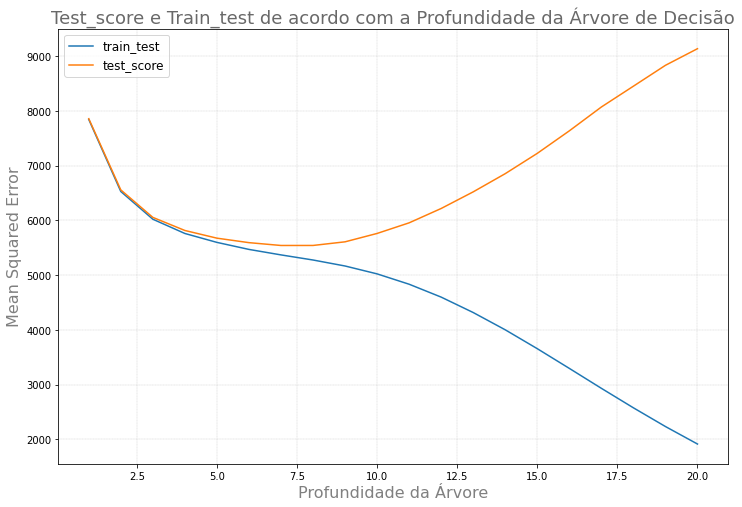

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,21), train_results, range(1,21), test_results)
plt.title('Test_score e Train_test de acordo com a Profundidade da Árvore de Decisão',fontsize=18, color = 'dimgrey')
plt.xlabel('Profundidade da Árvore', fontsize=16, color = 'grey')
plt.ylabel('Mean Squared Error', fontsize=16, color = 'grey')
plt.legend(['train_test','test_score'], fontsize=12)
plt.grid(True, zorder = 0, linestyle = '--', linewidth = 0.3)